<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/matplotlib_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafy v Pythonu - matplotlib a spol.

Pokud chceme v Pythonu vizualizovat data či vytvářet grafy vhodné do publikací, knihovna matplotlib představuje referenční standard. Ještě si ukážeme `plotly`, na konci dokumentu najdete odkazy na několik dalších knihoven.
<!-- TEASER_END -->

Tento notebook byl z části převzat, přeložen (a následně překopán ;-)) z [J.R. Johansson: Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures) - díky.

In [1]:
# Tato řádka způsobí, že se grafy zobrazí přímo v notebooku,
# místo aby se pouštěly v novém okně.
%matplotlib inline

# Můžete vyzkoušet i interaktivní mód notebook
# %matplotlib notebook

import IPython

**Poznámka:** Matplotlib nabízí 2 sady API: Jedno nabízí rozhraní s mnoha funkcemi a globálními proměnnými (modelované podle MATLABu), druhé je objektové a z hlediska dobrých programovacích návyků čistější. Budeme se tedy věnovat jen tomu druhému. Na internetu ovšem najdete příklady obojího.

Možná ještě častěji se setkáte s `%pylab`. To je obvykle rychlejší a vyhovující, my ale použijeme `%matplotlib` pro lepší přehled o tom, co vlastně děláme.

```
%pylab makes the following imports::

    import numpy
    import matplotlib
    from matplotlib import pylab, mlab, pyplot
    np = numpy
    plt = pyplot

    from IPython.display import display
    from IPython.core.pylabtools import figsize, getfigs

    from pylab import *
    from numpy import *
```

### Co matplotlib umí?

* Vytvářet 2D a 3D grafy.
* Umožňuje vytvářet popisky v $\LaTeX$u
* Kontrolovat nastavení všech grafických prvků v grafu. 
* Kvalitní grafický výstup, včetně formátů PNG, PDF, SVG, EPS.
* GUI pro interaktivní práci s grafy (zoomování, posouvání, ...).

Jedna z vlastností matplotlibu, která si zaslouží zdůraznění a která velice zjednodušuje vytváření vědeckých publikací, je možnost ovládat všechny aspekty a detaily grafu z kódu. Díky tomu můžete ihned zopakovat celý proces vytváření grafu s pozměněnými daty bez nutnosti jít znovu krok po kroku.

Více informací na stránkách projektu: http://matplotlib.org/

In [2]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt 
import matplotlib

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math

# Jednoduché grafy

### Objekty a třídy v matplolib

Každému prvku grafu připadá v objektovém rozhraní matplotlibu nějaký objekt:

**Figure** - objekt reprezentující celý obrázek (může obsahovat více různých grafů). Standardně se vytváří voláním `plt.figure()`, což není konstruktor v pravém slova smyslu (funkce vrací nový objekt, ale dělá toho ještě mnohem více).

**Axes** - objekt reprezentující nějakou soustavu souřadnic (jeden obdélník), do níž lze vykreslovat data. Obvykle se vytváří voláním metody `add_axes` na existujícím objektu `Figure`. Jiné způsoby si popíšeme dále.

**Line2D, ...** - každý typ grafu má vlastní třídu. 

**Text** - objekt reprezentující popisky všeho druhu.

### Nejjednodušší graf

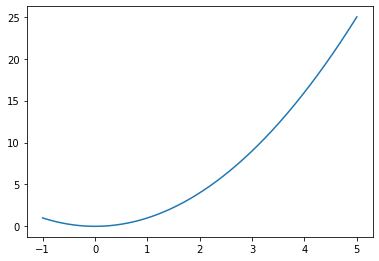

In [3]:
# Vytvoříme jednoduchá data
# (50 bodů rovnoměrně rozmístěných na úseku -1,5)
x = np.linspace(-1, 5, 80000)
y = x ** 2

fig = plt.figure()

# U add_axes musíme zadat, jakou část obrázku zabere čtverec se souřadnicemi
# zleva, odspodu, šířka, výška (v relativních hodnotách 0 až 1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

# Nyní vykreslíme data
# Středník na konci zajistí, že notebook ukazuje z návratové hodnoty jen grafický výstup
axes.plot(x, y);

Další datovou sadu do jednoho grafu přidáme opětovným zavoláním metody `plot` pro stejný objekt `Axes`:

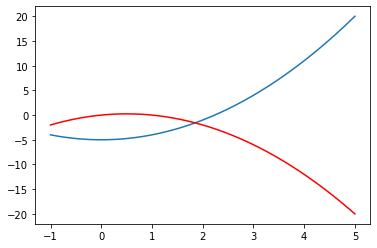

In [4]:
# Kratší získání Figure a Axes
# (pomocí rozdělení obrázku na 1x1 podgraf :-))
fig, axes = plt.subplots()

# Jen voláme vícekrát plot
axes.plot(x, y - 5)
axes.plot(x, x - y, color='red');   # druhá datová řada, jiná barva (r = červená)

Podobně můžeme vložit několik dvojic datových sad za sebou:

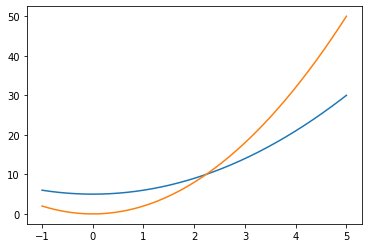

In [5]:
fix, axes = plt.subplots() 

# Dvě datové řady najednou
axes.plot(x, y + 5, x, y * 2);

### Popisky os (základ)

Pro přidání popisků os a nastavování dalších parametrů voláme metody objektu `Axes` (obvykle začínají na `set_`).

Text(0.5, 1.0, 'Druha mocnina')

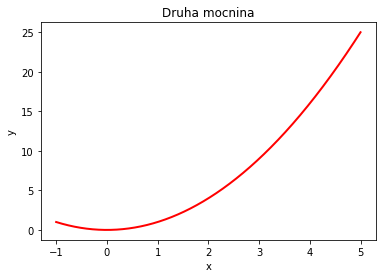

In [6]:
fig, axes = plt.subplots()

axes.plot(x, x ** 2, color='red', linewidth=2)  # Zopakujeme kreslení čárového grafu (+ přidáme styl)
axes.set_xlabel('x')                            # Nastavení popisku osy x
axes.set_ylabel('y')                            # Nastavení popisku osy y
axes.set_title('Druha mocnina')                 # Nastavení popisku celého grafu (soustavy souřadnic)  ;

Všechny popisky jsou typu **Text** a dá se s nimi pomocí metod tohoto objektu všemožně manipulovat.

## Ukládání do souboru

K tomuto účelu slouží metoda **savefig**:

In [7]:
# Základní uložení (typ souboru podle jména)
fig.savefig("filename.png")

# Parametry
fig.savefig("filename_with_dpi.png", dpi=800)

# Vektorová grafika
fig.savefig("filename.svg")
fig.savefig("filename.pdf")

# Další možnosti pro PDF výstup ("profi")
# fig.savefig("filename.pdf", bbox_inches='tight')    -- Bez bílých okrajů
# matplotlib.rcParams['text.usetex'] = True           -- a další možnosti (TeX použitý pro písmo)

Matplotlib nabízí výstup do mnoha formátů včetně PNG, JPEG, EPS, SVG, PDF. Do vědeckých publikací se nejvíce hodí PDF (zkompilujte dokumenty $\LaTeX$u pomocí příkazu `pdflatex`, který umožňuje PDF přímo vkládat `includegraphics`). 

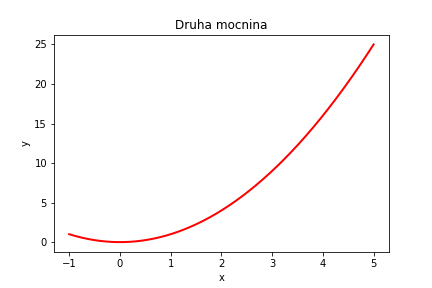

In [8]:
# Jednoduchý způsob, jak v Jupyter Notebooku zobrazit obrázek ze souboru
IPython.core.display.Image(filename="filename.png")

## Více grafů v jednom obrázku

### Přesné umístění

Na vytvoření více grafů v jednom obrázku není nic magického. Prostě jen zavoláme několikrát metodu `add_axes` objektu `Figure`.

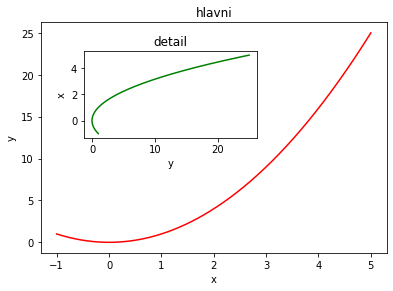

In [9]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Hlavní
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # Menší, vlevo nahoře

# Hlavní graf
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('hlavni')

# Vnořený graf
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('detail');

### Rozložení navržené matplotlibem

Matplotlib nabízí různé "správce rozložení", které se starají o rozložení více grafů do jednoho obrázku. Nejjednodušší z nich je `subplots`.

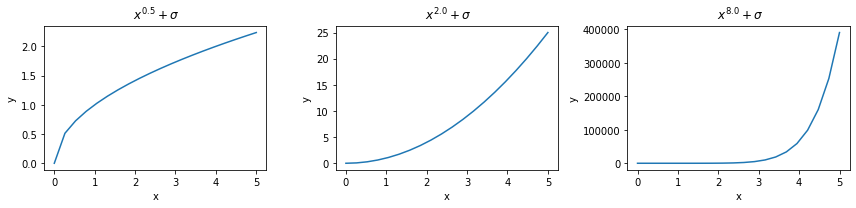

In [10]:
# Vytvoříme 1x3 podgrafy v širokém grafu.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for i, ax in enumerate(axes):
    # V numpy vytvoříme pravidelně rozmístěné hodnoty osy x
    x = np.linspace(0, 5, 20)
    
    # Umocníme na 
    power = (2. ** (2*i - 1))
    
    # Vypočítáme hodnoty y
    y = x ** power
    
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Použijeme LaTeXovou syntax pro správné vysázení titulku grafu.
    ax.set_title(' $x^{%.1f} + \sigma $ ' % power)
    
# Opravíme rozložení, aby nám grafy nelezly přes sebe.
fig.tight_layout()

### Komplikovanější rozložení

Pro vytvoření ještě komplikovanějších rozložení slouží metody `gridspec` a `subplot2grid`, viz http://matplotlib.org/users/gridspec.html.

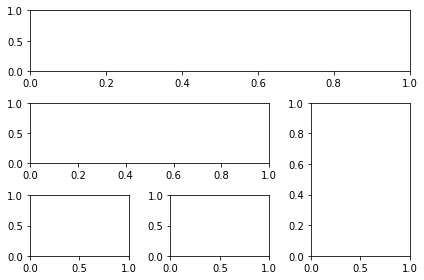

In [11]:
# Inspirující (a zároveň odstrašující) ukázka
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

### Dvě různé osy v jednom grafu

Pokud chceme v jednom grafu mít pro dvě různé datové sady dvě různé osy *x* nebo dvě různé osy *y*, můžeme použít metody `twinx` a `twiny` třídy `Axes`, které vytvoří novou soustavu souřadnic se sdílenou osou *x*, potažmo *y*.

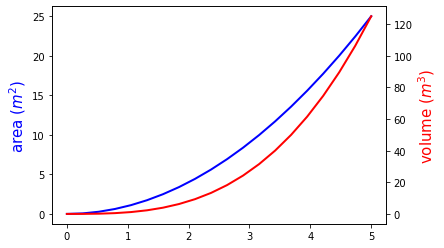

In [12]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, linewidth=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=15, color="blue")
    
ax2 = ax1.twinx() # Kopie soustavy souřadnic, sdílející osu x
ax2.plot(x, x**3, linewidth=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=15, color="red");

## Formátování a úpravy grafů

### Rozsah grafu

Rozsahy se nastavují pro každou osu souřadnic (objekt třídy `Axes` pomocí metod `set_xlim` a `set_ylim`.

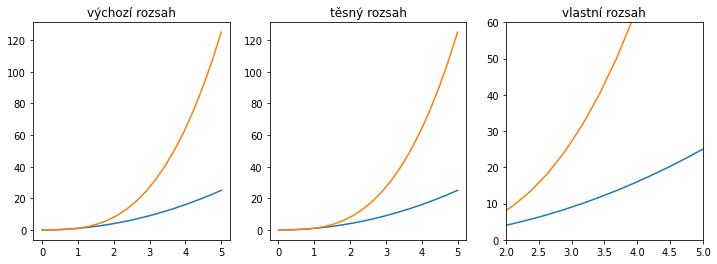

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("výchozí rozsah")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("těsný rozsah")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("vlastní rozsah");

### Logaritmická škála

K nastavení logaritmické škály slouží metody `set_xscale` a `set_yscale`.

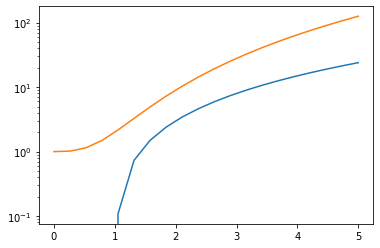

In [14]:
fig, ax = plt.subplots(1, 1) 

ax.plot(x, x**2 - 1, x, x**3 + 1)
ax.set_yscale("log")
# ax.set_xscale("log")

### Velikost obrázku, rozlišení

Ve chvíli, kdy vytváříme graf, můžeme mu nastavit velikost a rozlišení. Jupyter Notebook si s tím zachází lehce po svém (a ručí vlastně akorát poměrem stran), ale exportujete-li obrázky do vektorových či bitmapových formátů, můžete specifikovat přesnou velikost v palcích (`figsize`) a rozlišení v dpi neboli bodech na palec (`dpi`). Oba argumenty se při vytváření obrázku předávají funkci `figure` jako "keyword" argumenty:

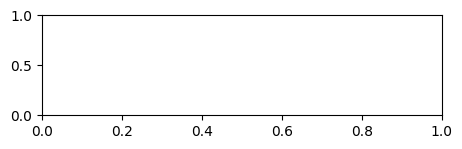

In [15]:
# Obrázek o velikost 4x1 palce s rozlišením 100 dpi
fig = plt.figure(figsize=(4, 1), dpi=100)
axes = fig.add_axes([0,0,1,1])

Argumenty lze předat i správcům rozložením, jako je např. fuknce `subplots`.

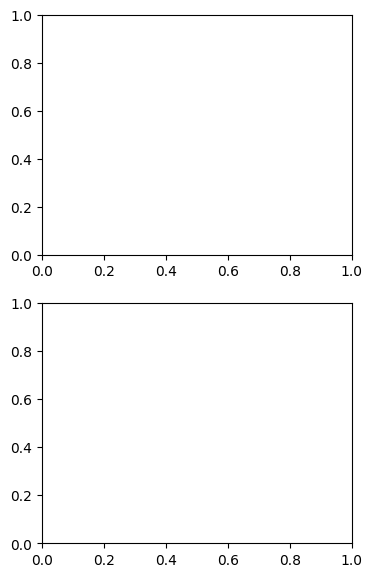

In [16]:
# Dva grafy pod sebou, které dohromady zaujímají obdélník 4x7 palců
fig, axes = plt.subplots(2, 1, figsize=(4, 7), dpi=100)

## Formátování textu

Každý textový objekt (popisek osy, legenda, titulek grafu, poznámky, ..., zkrátka instance třídy `Text`) má spoustu parametrů, které lze specifikovat. Celý výčet vlastností najdete v dokumentaci: http://matplotlib.org/api/artist_api.html#matplotlib.text.Text

Pro nás budou (kromě barev) podstatné parametry `fontsize` (velikost v bodech) a `family` (název nebo druh fontu). `family` akceptuje jméno existujícího fontu nebo název kategorie:

* `serif` - patkové písmo
* `sans-serif` - bezpatkové písmo (výchozí)
* `monospace` - písmo s pevnou šířkou
* ... a další, neužitečné ;-)

Pomocí `style="italic"` můžeme nastavit kurzívu, pomocí `weight="bold"` tučné písmo (tlouštěk je hned několik, viz dokumentace).



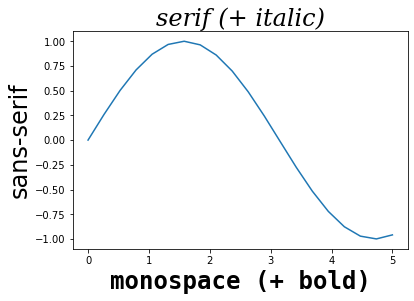

In [17]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))
ax.set_xlabel('monospace (+ bold)', family="monospace", fontsize=24, weight="bold")
ax.set_ylabel('sans-serif', family="sans-serif", fontsize=24)
ax.set_title('serif (+ italic)', family="serif", fontsize=24, style="italic");

### Podpora $LaTeX$u

Matplotlib nabízí výbornou podporu $LaTeX$u. Jakýkoliv text můžeme (ostatně, totéž nabízí i Jupyter Notebook!) obklopit dvěma znaky dolaru a matplotlibu tak řekneme, že jej má interpretovat jako Latexový zdroják. Například napíšeme `"$y=x^3$"` a dostaneme $y=x^3$. To můžeme použít v `set_xlabel`, `set_ylabel`, `set_title` i kdekoliv jinde.

Pokud ale chceme vkládat příkazy LaTeXu, které začínají na zpětné lomítko `\`, musíme si dát pozor, abychom ho správně vložili. Python totiž standardně zpětné lomítko slouží pro escape sekvence. Musíme tedy buď všechna lomítka zdvojit, nebo použít tzv. raw stringy ("syrové řetězce"), které se píší s `r` před uvozovkami a escape sekvence ignorují: `r"\alpha"` nám vyprodukuje $\alpha$.

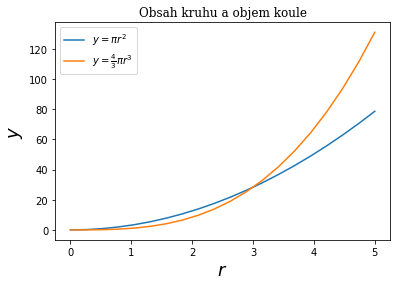

In [18]:
fig, ax = plt.subplots()

ax.plot(x, math.pi * x**2, label=r"$y = \pi r^2$")
ax.plot(x, 1.0 / 3 * math.pi * x**3, label=r"$y = \frac{4}{3}\pi r^3$")
ax.set_xlabel(r'$r$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('Obsah kruhu a objem koule', family="serif")
ax.legend(loc=2);     # Použití legendy viz dále

Je též možné některé parametry nastavit jako výchozí pro celý matplotlib (typicky se hodí umístit na vrch skriptu / notebooku). Může to být užitečné, v tomto notebooku se tomu raději vyhneme.

In [19]:
# Nastavení výchozích hodnot pro Matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

# A hned zase zpátky, abychom si nerozhodili zbytek notebooku
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

In [20]:
matplotlib.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

## Barvy a styly

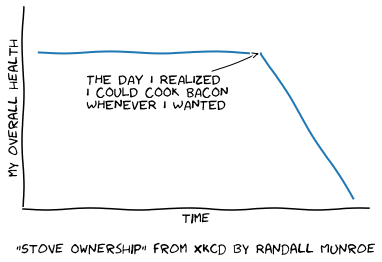

In [21]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

### Barvy

V matplotlibu se barvy čar, textu apod. dají specifikovat dvěma způsoby (preferujeme druhý):

* pomocí jednopísmenných zkratek přímo v argumentu pro styl metody `plot` jako v MATLABu: `b` znamená modrou, `r` červenou, `g` zelenou a tak dále.

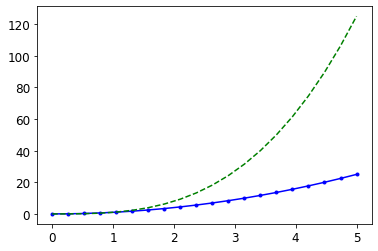

In [22]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')       # Modrá čára s tečkami
ax.plot(x, x**3, 'g--');      # Zelená přerušovaná čára

* pomocí keyword argumentů `color` a (případně) `alpha`. Do prvního (`color`) můžeme zadat anglický název barvy nebo její hexadecimální vyjádření (viz třeba http://www.colorcodehex.com/html-color-picker.html), druhý nepovinný argument (`alpha`) vyjadřuje míru průhlednosti (0 = zcela průhledná, 1 = zcela neprůhledná).

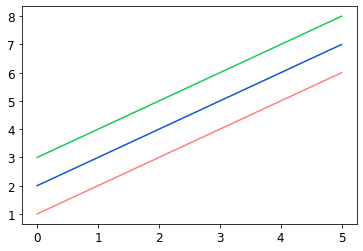

In [23]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # Poloprůhledná červená
ax.plot(x, x+2, color="#1155dd")        # Jakási namodralá barva
ax.plot(x, x+3, color="#15cc55");       # Jakási nazelenalá barva 

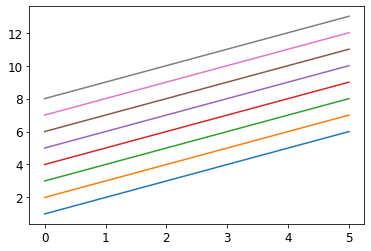

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x+1); # Jakási  barva
ax.plot(x, x+2); # Jakási  barva
ax.plot(x, x+3); # Jakási  barva 
ax.plot(x, x+4); # Jakási  barva 
ax.plot(x, x+5); # Jakási  barva
ax.plot(x, x+6); # Jakási  barva
ax.plot(x, x+7); # Jakási  barva
ax.plot(x, x+8); # Jakási  barva

### Styly čar a značek

Pro nastavení vlastností čáry grafu slouží keyword argumenty metody `plot`:

* `linewidth` nebo `lw` - tloušťka čáry v bodech
* `linestyle` nebo `ls`- styl čáry
* `color` - barva

Podobně nastavení značek bodů se přidává argumenty začínajícími na `marker` v téže metodě:

* `marker` - druh značky 
* `markersize` - velikost značky
* `markerfacecolor` - barva vnitřku značky
* `markeredgewidth` - tloušťka okraje
* `markeredgecolor` - barva okraje



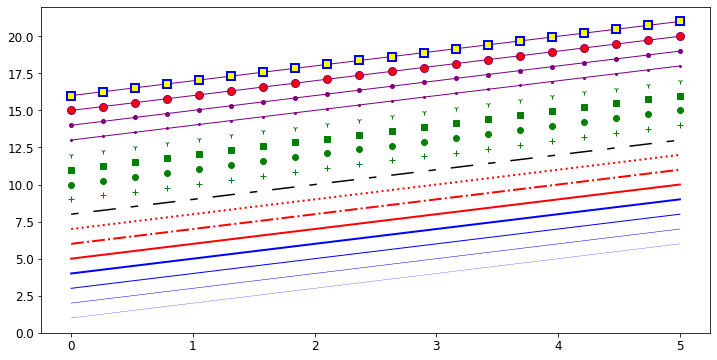

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

# Tloušťka čáry
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# Základní styly přerušované čáry ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# Vlastní styl přerušované čáry
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # formát: délka čáry, délka mezery, ...

# Výběr typu značek: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='', marker='1')

# Velikost značek a jejich barvy (vnitřní a vnější)
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Vzhled osy

### Umístění značek a jejich popisků

K umístění značek slouží metody `set_xticks` a `set_yticks`, jimž jako argument předáme seznam všech hodnot, kde má být značka umístěna. Pomocí `set_xticklabels` a `set_yticklabels` pak můžeme pro každou značku specifikovat vlastní popisek (pokud nám výchozí nedostačuje).

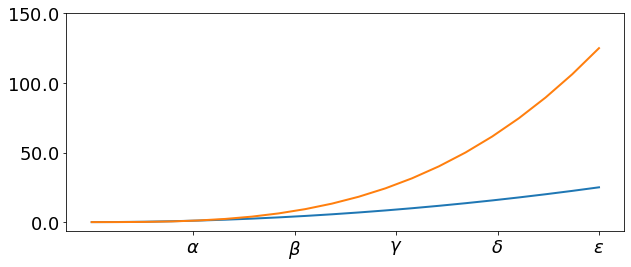

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18)     ;

[Text(0.0, 0, '0'),
 Text(1.5707963267948966, 0, '$\\frac{\\pi}{2}$'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(4.71238898038469, 0, '$\\frac{3 \\pi}{2}$'),
 Text(6.283185307179586, 0, '$2 \\pi$'),
 Text(7.853981633974483, 0, 'bla')]

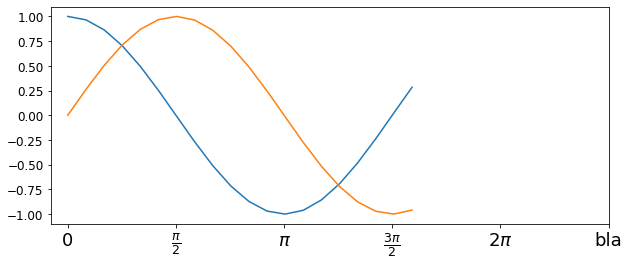

In [27]:
#totez ale s lepsim zpusobe vyuziti
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, np.cos(x), x, np.sin(x))

ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi, 2*np.pi+np.pi/2])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3 \pi}{2}$', r'$2 \pi$', 'bla'], fontsize=18)

Více detailů můžete nalézt zde: http://matplotlib.org/api/ticker_api.html.

## Další prvky grafu

### Legenda

Pokud chceme do grafu přidat legendu, měli bychom každé datové sadě přiřadit název pomocí keyword argumentu `label`. 
Potom ještě musíme metodou `legend` legendu pro danou souřadnicovou soustavu zobrazit. (*Poznámka: Existuje i jiný způsob, bližší volání v MATLABu, ale ten zde úmyslně nezmiňujeme.*)

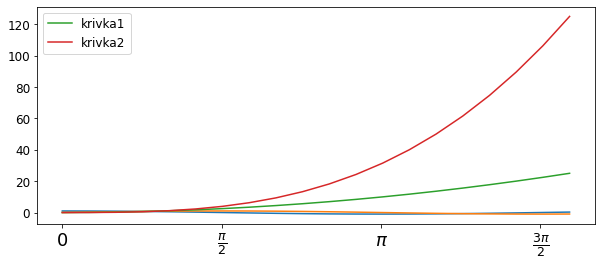

In [28]:
ax.plot(x, x**2, label="krivka1")
ax.plot(x, x**3, label="krivka2")
ax.legend()
fig

Metoda `legend` přijímá keyword argument `loc`, který vyjadřuje, kam má legenda přijít. Hodnoty parametru jsou číselné a vybírají se z několika předdefinovaných hodnot. Uvádíme některé nejčastější. Více viz http://matplotlib.org/users/legend_guide.html#legend-location .

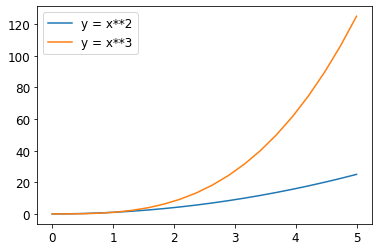

In [29]:
# Hodnoty argumentu loc
ax.legend(loc=0) # Nechť matplotlib vybere, co považuje za nejvhodnější
ax.legend(loc=1) # Pravý horní roh
ax.legend(loc=2) # Levý horní roh
ax.legend(loc=3) # Levý dolní roh
ax.legend(loc=4) # Pravý dolní roh
# ... a mnoho dalších možností


# Praktická ukázka
fig, ax = plt.subplots()
ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2)   # levý horní roh            ;

### Mřížka

Zobrazení mřížky se nastavuje metodou `grid`. Její nejjednodušší varianta přijímá jeden booleovský argument a matplotlib se postará o rozumné výchozí vlasnosti. Nicméně můžeme pomocí keyword argumentů vzhled mřížky specifikovat detailněji:

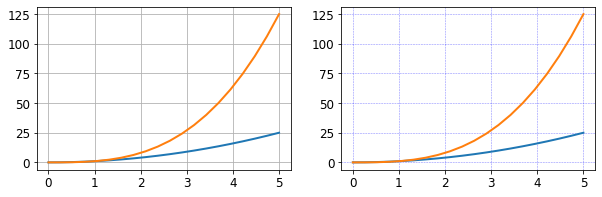

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# Nastavení výchozí mřížky
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# Nastavení výchozí mřížky s vlastnostmi
# (alpha vyjadřuje průhlednost - 0=zcela průhledná, 1=zcela neprůhledná)
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Libovolné textové poznámky

Pomocí metody `text` lze do grafů (třídy `Axes`) vkládat další poznámky nezávisle na osách. Pozice se udává v souřadnicích samotného grafu, nikoliv v relativních souřadnicích grafu. Opět můžeme použít $\LaTeX$ovou syntaxi.

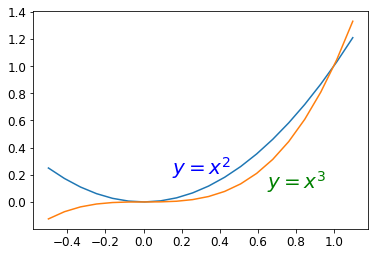

In [31]:
fig, ax = plt.subplots()

xx = np.linspace(-.5, 1.1, 20)
ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Další typy 2D grafů

Zatím jsme pracovali pouze s metodou `plot` a kreslili jsme čárové grafy. Kromě čárových pak existuje ještě mnoho dalších typů grafu. Jejich kompletní výčet najdete v galerii http://matplotlib.org/gallery.html. Uvádíme některé z nich pro ukázku:

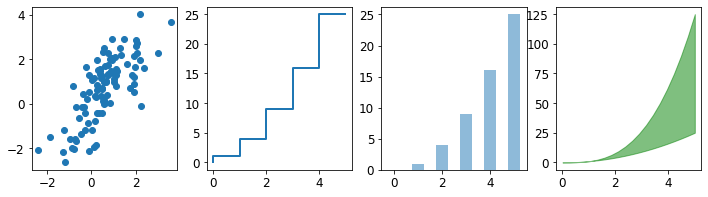

In [32]:
import numpy.random as random

n = np.array([0,1,2,3,4,5])
xx = np.linspace(0, 1, 100) + random.randn(100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

# Bodový graf
axes[0].scatter(xx, xx + random.randn(len(xx)))

# Schodový graf
axes[1].step(n, n**2, lw=2)

# Sloupcový graf
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

# Výplň mezi křivkami
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)

### Histogram

(array([   6.,   20.,   46.,  150.,  297.,  541.,  874., 1208., 1403.,
        1549., 1325., 1134.,  692.,  415.,  190.,   92.,   39.,   12.,
           5.,    2.]),
 array([-3.48696223, -3.11114318, -2.73532413, -2.35950508, -1.98368602,
        -1.60786697, -1.23204792, -0.85622887, -0.48040981, -0.10459076,
         0.27122829,  0.64704734,  1.0228664 ,  1.39868545,  1.7745045 ,
         2.15032356,  2.52614261,  2.90196166,  3.27778071,  3.65359977,
         4.02941882]),
 <BarContainer object of 20 artists>)

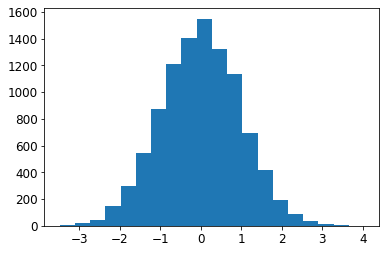

In [33]:
n = np.random.randn(10000)     # Spousta náhodných čísel (norm.rozdělení)
plt.hist(n, 20)                # Histogram o 20 "binech"

### Polární grafy

Můžeme samozřejmě vytvářet i polární grafy, stačí jen správně zadat argumenty metody `add_axes`:

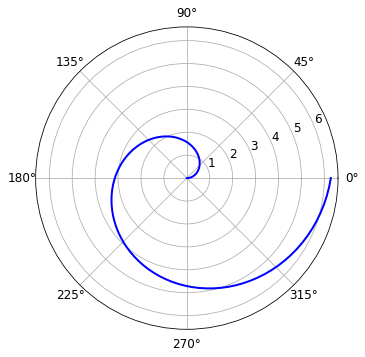

In [34]:
fig = plt.figure(figsize=(7,7))

# Polární souřadnice
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * math.pi, 100)

# Jednoduchá spirála
ax.plot(t, t, color='blue', lw=2);

## Dvourozměrná vizualizace dvoudimenzionálních dat

Pokud máme vizualizovat hodnoty závislé na hodnotách dvou parametrů, $z = f(x, y)$, můžeme buď hodnoty kódovat barevně, nebo pomocí obrysového grafu. Ukážeme si obojí.

In [35]:
# Náhodně zhůvěřilá funkce
x = np.linspace(0, 6, 1000)
y = np.linspace(0, 6, 1000)
X, Y = np.meshgrid(x, y)
Z = ((np.sin((X + Y) ** 1.5) + 1.01) / 2) ** (np.cos(Y*3) + 1) + np.sin((X + Y) / 20)
Z = Z.T

### pcolor (barevné kódování hodnoty)

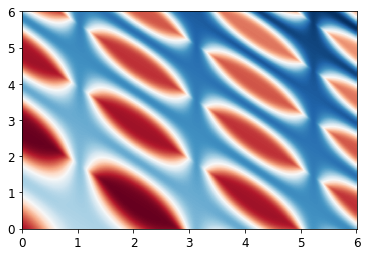

In [36]:
fig, ax = plt.subplots()

p = ax.pcolor(X, Y, Z, shading='auto', cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
# cb = fig.colorbar(p, ax=ax)

### imshow (obrazová data)

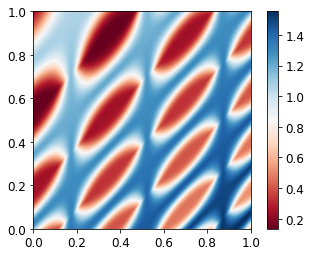

In [37]:
fig, ax = plt.subplots()

im = plt.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

### contour (obrysový graf)

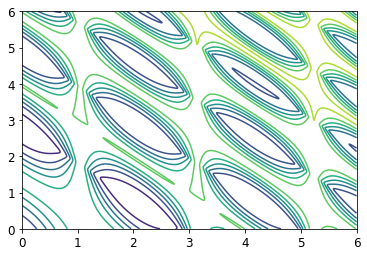

In [38]:
fig, ax = plt.subplots()
cnt = plt.contour(X, Y, Z, extent=[0, 1, 0, 1])

## 3D grafy

Pro kreslení trojrozměrných grafů musíme nejdřív vytvořit trojrozměrnou soustavu souřadnici jako instanci třídý `Axes3D`. 3D grafy můžeme do obrázku vkládat stejně jako dvourozměrné, nejjednodušší je ale použít keyword argument `projection='3d'` u klasických metod `add_axes` a `add_subplot`.

In [39]:
from mpl_toolkits.mplot3d import Axes3D

### Povrchové grafy

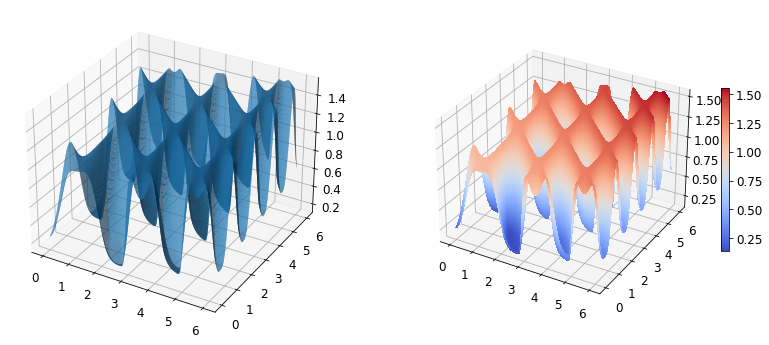

In [40]:
fig = plt.figure(figsize=(14,6))

# `ax` je trojrozměrná osa (díky keyword argumentu projection)
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# Povrchový graf s doprovodnou barevnou informací
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

### Drátěný (wire-frame) graf

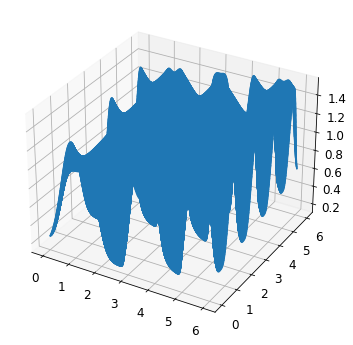

In [41]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

Více informací o trojrozměrných grafech najdete zde: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

## Backendy

Matplotlib nabízí spoustu tzv. "backendů", které se starají o vytváření grafů v různých formátech (SVG, PNG, PDF, ...) a jejich zobrazování pomocí různých technologií (Qt, GTK, přímo v Jupyter Notebooku atp.). Některé jsou interaktivní, jiné ne, nebudeme si je ale ukazovat jeden po druhém.

Seznam všech podporovaných backendů v aktuální instalaci matplotlibu:

In [43]:
print(matplotlib.rcsetup.all_backends)

['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


Pro nás je podstatné, jakým způsobem nastavit zobrazování přímo v Jupyter Notebooku. Někde na začátku souboru (před grafy) uveďte:

`%matplotlib inline`.

Pokud máte starší IPython (< 1.0), nebo chcete pracovat MATLABovským stylem (všechny relevantní numpy a matplotlib jmenné prostory importované), zvolte:

`%pylab inline`

Každopádně doporučujeme čistší první způsob.

Ne vždy se hodí inline backend. Především pokud chceme s grafem interaktivně pracovat (zoom, posun apod.) použijeme např. Qt4 backend pomocí
```
%matplotlib qt4
```

## Odkazy

* http://www.matplotlib.org - Hlavní stránka projektu
* http://matplotlib.org/gallery.html - Galerie se spoustou příkladů toho, co se v matplotlib dá udělat.
* http://www.loria.fr/~rougier/teaching/matplotlib - Dobrý tutoriál (v angličtině).

## Jak vylepšit (nebo také ne) vzhled grafů z Matplotlib

* https://matplotlib.org/tutorials/introductory/customizing.html
* https://github.com/mwaskom/seaborn

## Další knihovny pro práci s grafy

* **Plotly** - JavaScript knihovna s Python API a také online prostředím pro kreslení grafů: https://plot.ly/
* **Bokeh** - interaktivní grafy pomocí HTML + JS od Continuum Analytics, http://bokeh.pydata.org/
* **Holoviews** - vizualizace dat propojená s práci s daty samotnými.
* a další, přehled najdete na https://pyviz.org/

# Cviceni

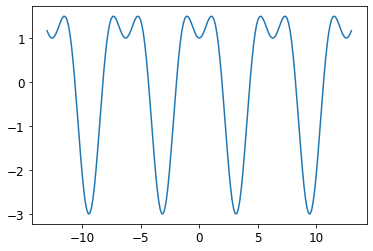

In [47]:
fig, ax = plt.subplots()
a = 1
b = 1

t = np.linspace(-13, 13, 200)
ax.plot(t, (a+b)*np.cos(t) - b*np.cos((a/b+1)*t))
#ax.plot(xx, xx**2, xx, xx**3)

#ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
#ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

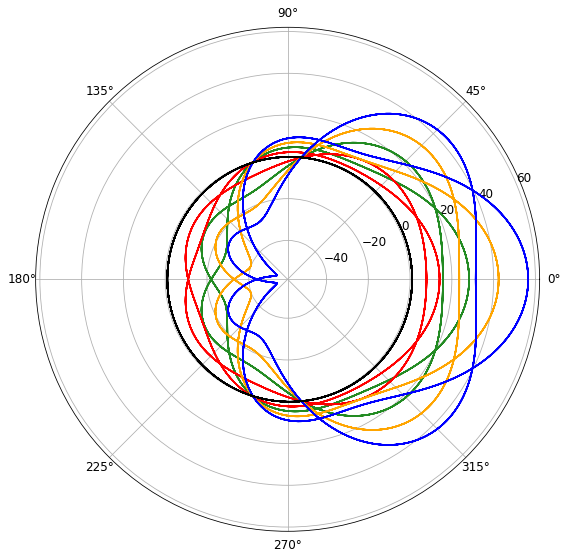

In [81]:
fig = plt.figure(figsize=(7,7))
a = 4.23
b = 2.35

a = 5
b = 2

# Polární souřadnice
ax = fig.add_axes([0.0, 0.0, 1, 1], polar=True)
t = np.linspace(0, 20 * np.pi, 10000)

# Jednoduchá spirála
#ax.plot(t, t, color='blue', lw=2);
ax.plot(t, np.pi *  ( (a+b)*np.cos(t) - b*np.cos((a/b+1)*t)  )  , color='forestgreen')
ax.plot(t, np.pi/2 *   ( (a+b)*np.cos(t) - b*np.cos((a/b+1)*t) ), color='red')
ax.plot(t, 3*np.pi/2 *  (  (a+b)*np.cos(t) - b*np.cos((a/b+1)*t)  )  , color='orange')
ax.plot(t, 2*np.pi *  (  (a+b)*np.cos(t) - b*np.cos((a/b+1)*t)  ), color='blue')
ax.plot(t, np.cos(t), color='black')
#ax.plot(t, (a+b)*np.sin(t) - b*np.sin((a/b+1)*t), color='forestgreen')

fig.savefig("divny_obrazek.svg")